# Analisis Sentimen tingkat kepuasan Costumer pada produk Smartphone dengan metode Ensemble Learning

In [34]:
#Library import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/MSIB Project/Dataset

/content/drive/My Drive/MSIB Project/Dataset


# Input Dataset

In [4]:
#read dataset = 510 rows
dt = pd.read_csv('HP_K.csv')
dt.head()

,label,komentar
0,1,Mantapppp Original Masih segel Sesue deskripsi...
1,1,packing aman respon cepat
2,0,tidak ada plastik buat hp nya garansi sdh sobek
3,0,kecewa sama kurirnya aja kelamaan
4,1,mantep puas banget


In [5]:
#split label data 
y = dt['label']
y[0:10]

0    1
1    1
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: label, dtype: int64

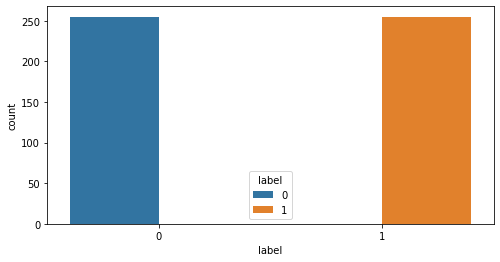

In [6]:
#menampilkan nilai tiap label
plt.figure(figsize=(8,4))
sns.countplot(x='label', hue='label',data=dt)



In [7]:
#menampilkan jumlah data msing masing label
dt['label'].value_counts()

1    255
0    255
Name: label, dtype: int64

In [8]:
display(dt.shape)

(510, 2)

kami menggunkan data yang 500 data karena balance daripada yang menggunkan 1500 data yang imbalance

# Proses Preprocessing dataset

In [9]:
import nltk
import requests
import string
import re
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenize

In [10]:
dt['tokenize_komentar'] = dt.komentar.apply(lambda x: word_tokenize(x))
dt.head()

,label,komentar,tokenize_komentar
0,1,Mantapppp Original Masih segel Sesue deskripsi...,"[Mantapppp, Original, Masih, segel, Sesue, des..."
1,1,packing aman respon cepat,"[packing, aman, respon, cepat]"
2,0,tidak ada plastik buat hp nya garansi sdh sobek,"[tidak, ada, plastik, buat, hp, nya, garansi, ..."
3,0,kecewa sama kurirnya aja kelamaan,"[kecewa, sama, kurirnya, aja, kelamaan]"
4,1,mantep puas banget,"[mantep, puas, banget]"


menghilangkan stopwords

In [11]:
#memuat stopword
url = "https://raw.githubusercontent.com/notfound313/sentimen-analysis/main/stopwordlist.txt"
stopwords_ina= requests.get(url).content

stopList = []
for stopword in stopwords_ina:
  stopList.append(stopword)

In [12]:
def cleaning(data):
  data = re.sub('[%s]' % re.escape(string.punctuation), ' ',data)
  data = str(data.lower()).strip()
  tokens=[]
  for token in data.split():
    if token not in stopList:
      tokens.append(token)
  return " ".join(tokens)



In [13]:
dt['clean_komen'] = dt.komentar.apply(lambda x: cleaning(x))
dt.head()

,label,komentar,tokenize_komentar,clean_komen
0,1,Mantapppp Original Masih segel Sesue deskripsi...,"[Mantapppp, Original, Masih, segel, Sesue, des...",mantapppp original masih segel sesue deskripsi...
1,1,packing aman respon cepat,"[packing, aman, respon, cepat]",packing aman respon cepat
2,0,tidak ada plastik buat hp nya garansi sdh sobek,"[tidak, ada, plastik, buat, hp, nya, garansi, ...",tidak ada plastik buat hp nya garansi sdh sobek
3,0,kecewa sama kurirnya aja kelamaan,"[kecewa, sama, kurirnya, aja, kelamaan]",kecewa sama kurirnya aja kelamaan
4,1,mantep puas banget,"[mantep, puas, banget]",mantep puas banget


# Modeling


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
#membangun vector space model / pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
X = vectorizer.fit_transform(dt.clean_komen).toarray()

In [16]:
#melakukan split data trainning dan testing 80:20
X_train_2, X_test_2,y_train_2,y_test_2 = train_test_split(X, y,test_size=0.2, random_state=0,stratify=y)
#melakukan split data trainning dan testing 70:30
X_train_3, X_test_3,y_train_3,y_test_3 = train_test_split(X, y,test_size=0.3, random_state=0,stratify=y)


pembuatan 3 model dengan melakukan voting Clisifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
 

In [18]:
from sklearn.metrics.pairwise import kernel_metrics
m_knn = KNeighborsClassifier(n_neighbors=20)
m_nv= GaussianNB()
m_svm = SVC()

m_knn_3 = KNeighborsClassifier(n_neighbors=20)
m_nv_3= GaussianNB()
m_svm_3= SVC(kernel='linear')

In [19]:
#dataset 80:20
m_knn.fit(X_train_2, y_train_2)
m_nv.fit(X_train_2, y_train_2)
m_svm.fit(X_train_2, y_train_2)
#dataset 70:30
m_knn_3.fit(X_train_3, y_train_3)
m_nv_3.fit(X_train_3, y_train_3)
m_svm_3.fit(X_train_3, y_train_3)

SVC(kernel='linear')

In [20]:
#dataset 80:20
pred_knn = m_knn.predict(X_test_2)
pred_nv = m_nv.predict(X_test_2)
pred_svm = m_svm.predict(X_test_2)
#dataset 70:30
pred_knn_3 = m_knn.predict(X_test_3)
pred_nv_3= m_nv.predict(X_test_3)
pred_svm_3= m_svm.predict(X_test_3)

In [21]:
#dataset 80:20
print("akurasi KNN : %f " % (accuracy_score(y_test_2,pred_knn)))
print("akurasi Naive Bayes: %f " % (accuracy_score(y_test_2,pred_nv)))
print("akurasi SVM: %f " % (accuracy_score(y_test_2,pred_svm)))

akurasi KNN : 0.852941 
akurasi Naive Bayes: 0.892157 
akurasi SVM: 0.911765 


In [22]:
#dataset 70:30
print("akurasi KNN : %f " % (accuracy_score(y_test_3,pred_knn_3)))
print("akurasi Naive Bayes: %f " % (accuracy_score(y_test_3,pred_nv_3)))
print("akurasi SVM: %f " % (accuracy_score(y_test_3,pred_svm_3)))

akurasi KNN : 0.875817 
akurasi Naive Bayes: 0.901961 
akurasi SVM: 0.947712 


Proses penggabungan model

In [23]:
from sklearn.ensemble import VotingClassifier
#dataset 80:20
model_VC = VotingClassifier(estimators =[('knn',m_knn), ('nv', m_nv),('svm', m_svm)], voting='hard')
model_VC.fit(X_train_2,y_train_2)
pred_mvc= model_VC.predict(X_test_2)
#dataset 70:30
model_VC_3= VotingClassifier(estimators =[('knn',m_knn_3),('nv', m_nv_3),('svm', m_svm)], voting='hard')
model_VC_3.fit(X_train_3,y_train_3)
pred_mvc_3= model_VC_3.predict(X_test_3)



print("akurasi VC 80:20 : %f " % (accuracy_score(y_test_2,pred_mvc)))
print("akurasi VC 70:30 : %f " % (accuracy_score(y_test_3,pred_mvc_3)))

akurasi VC 80:20 : 0.892157 
akurasi VC 70:30 : 0.921569 


# Evaluasi

Hasil dataset 80:20

In [24]:
#melakukan evaluasi pada model
from sklearn.metrics import  classification_report,confusion_matrix, accuracy_score,recall_score, precision_score,f1_score, roc_auc_score

print("K-Nearst Neighbor")
print("Accuracy = ", round(accuracy_score(y_test_2, pred_knn)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_2, pred_knn)*100,2),'%')
print("precision  = ", round(precision_score(y_test_2, pred_knn)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_2, pred_knn)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_2, pred_knn))
print("")
print("Naive Bayes")
print("Accuracy = ", round(accuracy_score(y_test_2, pred_nv)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_2, pred_nv)*100,2),'%')
print("precision  = ", round(precision_score(y_test_2, pred_nv)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_2, pred_nv)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_2, pred_nv))
print("")
print("SVM")
print("Accuracy = ", round(accuracy_score(y_test_2, pred_svm)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_2, pred_svm)*100,2),'%')
print("precision  = ", round(precision_score(y_test_2, pred_svm)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_2, pred_svm)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_2, pred_svm))
print("")
print("Voting Classifier")
print("Accuracy = ", round(accuracy_score(y_test_2, pred_mvc)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_2, pred_mvc)*100,2),'%')
print("precision  = ", round(precision_score(y_test_2, pred_mvc)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_2, pred_mvc)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_2, pred_mvc))
print("")

print("KNN")
print(confusion_matrix(y_test_2,pred_knn))
print("Naive Bayes")
print(confusion_matrix(y_test_2,pred_nv))
print("SVM")
print(confusion_matrix(y_test_2,pred_svm))
print("Voting Classifier")
print(confusion_matrix(y_test_2,pred_mvc))
print("")

print("KNN")
print(classification_report(y_test_2,pred_knn))
print("Naive Bayes")
print(classification_report(y_test_2,pred_nv))
print("SVM")
print(classification_report(y_test_2,pred_svm))
print("Voting Classifier")
print(classification_report(y_test_2,pred_mvc))



K-Nearst Neighbor
Accuracy =  85.29 %
Recall  =  80.39 %
precision  =  89.13 %
F1-scrore  =  84.54 %
ROC AUC = 0.8529411764705883

Naive Bayes
Accuracy =  89.22 %
Recall  =  84.31 %
precision  =  93.48 %
F1-scrore  =  88.66 %
ROC AUC = 0.8921568627450981

SVM
Accuracy =  91.18 %
Recall  =  94.12 %
precision  =  88.89 %
F1-scrore  =  91.43 %
ROC AUC = 0.9117647058823529

Voting Classifier
Accuracy =  89.22 %
Recall  =  86.27 %
precision  =  91.67 %
F1-scrore  =  88.89 %
ROC AUC = 0.8921568627450982

KNN
[[46  5]
 [10 41]]
Naive Bayes
[[48  3]
 [ 8 43]]
SVM
[[45  6]
 [ 3 48]]
Voting Classifier
[[47  4]
 [ 7 44]]

KNN
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        51
           1       0.89      0.80      0.85        51

    accuracy                           0.85       102
   macro avg       0.86      0.85      0.85       102
weighted avg       0.86      0.85      0.85       102

Naive Bayes
              precision    recall  f1-

Dataset 70:30

In [25]:
#melakukan evaluasi pada model
print("K-Nearst Neighbor")
print("Accuracy = ", round(accuracy_score(y_test_3, pred_knn_3)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_3, pred_knn_3)*100,2),'%')
print("precision  = ", round(precision_score(y_test_3, pred_knn_3)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_3, pred_knn_3)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_3, pred_knn_3))
print("")
print("Naive Bayes")
print("Accuracy = ", round(accuracy_score(y_test_3, pred_nv_3)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_3, pred_nv_3)*100,2),'%')
print("precision  = ", round(precision_score(y_test_3, pred_nv_3)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_3, pred_nv_3)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_3, pred_nv_3))
print("")
print("SVM")
print("Accuracy = ", round(accuracy_score(y_test_3, pred_svm_3)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_3, pred_svm_3)*100,2),'%')
print("precision  = ", round(precision_score(y_test_3, pred_svm_3)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_3, pred_svm_3)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_3, pred_svm_3))
print("")
print("Voting Classifier")
print("Accuracy = ", round(accuracy_score(y_test_3, pred_mvc_3)*100,2),'%')
print("Recall  = ", round(recall_score(y_test_3, pred_mvc_3)*100,2),'%')
print("precision  = ", round(precision_score(y_test_3, pred_mvc_3)*100,2),'%')
print("F1-scrore  = ", round(f1_score(y_test_3, pred_mvc_3)*100,2),'%')
print("ROC AUC =", roc_auc_score(y_test_3, pred_mvc_3))
print("")

print("KNN")
print(confusion_matrix(y_test_3,pred_knn_3))
print("Naive Bayes")
print(confusion_matrix(y_test_3,pred_nv_3))
print("SVM")
print(confusion_matrix(y_test_3,pred_svm_3))
print("Voting Classifier")
print(confusion_matrix(y_test_3,pred_mvc_3))
print("")

print("KNN")
print(classification_report(y_test_3,pred_knn_3))
print("Naive Bayes")
print(classification_report(y_test_3,pred_nv_3))
print("SVM")
print(classification_report(y_test_3,pred_svm_3))
print("Voting Classifier")
print(classification_report(y_test_3,pred_mvc_3))



K-Nearst Neighbor
Accuracy =  87.58 %
Recall  =  81.58 %
precision  =  92.54 %
F1-scrore  =  86.71 %
ROC AUC = 0.8754272043745728

Naive Bayes
Accuracy =  90.2 %
Recall  =  84.21 %
precision  =  95.52 %
F1-scrore  =  89.51 %
ROC AUC = 0.9015721120984278

SVM
Accuracy =  94.77 %
Recall  =  96.05 %
precision  =  93.59 %
F1-scrore  =  94.81 %
ROC AUC = 0.9477956254272044

Voting Classifier
Accuracy =  92.16 %
Recall  =  89.47 %
precision  =  94.44 %
F1-scrore  =  91.89 %
ROC AUC = 0.9213943950786057

KNN
[[72  5]
 [14 62]]
Naive Bayes
[[74  3]
 [12 64]]
SVM
[[72  5]
 [ 3 73]]
Voting Classifier
[[73  4]
 [ 8 68]]

KNN
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.93      0.82      0.87        76

    accuracy                           0.88       153
   macro avg       0.88      0.88      0.88       153
weighted avg       0.88      0.88      0.88       153

Naive Bayes
              precision    recall  f1-s

# Cek Overvitting undervitting

In [ ]:
#dataset 80:20
print('K-nearst neighbors')
print('Training set score : {:.4f}'.format(m_knn.score(X_train_2, y_train_2)))
print('Test set score: {:.4f}'.format(m_knn.score(X_test_2, y_test_2)))
print("")
print('Naive Bayes')
print('Training set score : {:.4f}'.format(m_nv.score(X_train_2, y_train_2)))
print('Test set score: {:.4f}'.format(m_nv.score(X_test_2, y_test_2)))
print("")
print('SVM')
print('Training set score : {:.4f}'.format(m_svm.score(X_train_2, y_train_2)))
print('Test set score: {:.4f}'.format(m_svm.score(X_test_2, y_test_2)))
print("")
print('Voting Classfier')
print('Training set score : {:.4f}'.format(model_VC.score(X_train_2, y_train_2)))
print('Test set score: {:.4f}'.format(model_VC.score(X_test_2, y_test_2)))
print("")


K-nearst neighbors
Training set score : 0.8676
Test set score: 0.8529

Naive Bayes
Training set score : 0.9142
Test set score: 0.8922

SVM
Training set score : 0.9828
Test set score: 0.9118

Voting Classfier
Training set score : 0.9338
Test set score: 0.8922



In [ ]:
#dataset 70:30
print('K-nearst neighbors')
print('Training set score : {:.4f}'.format(m_knn_3.score(X_train_3, y_train_3)))
print('Test set score: {:.4f}'.format(m_knn_3.score(X_test_3, y_test_3)))
print("")
print('Naive Bayes')
print('Training set score : {:.4f}'.format(m_nv_3.score(X_train_3, y_train_3)))
print('Test set score: {:.4f}'.format(m_nv_3.score(X_test_3, y_test_3)))
print("")
print('SVM')
print('Training set score : {:.4f}'.format(m_svm_3.score(X_train_3, y_train_3)))
print('Test set score: {:.4f}'.format(m_svm_3.score(X_test_3, y_test_3)))
print("")
print('Voting Classfier')
print('Training set score : {:.4f}'.format(model_VC_3.score(X_train_3, y_train_3)))
print('Test set score: {:.4f}'.format(model_VC_3.score(X_test_3, y_test_3)))
print("")

K-nearst neighbors
Training set score : 0.8515
Test set score: 0.8758

Naive Bayes
Training set score : 0.9048
Test set score: 0.8758

SVM
Training set score : 0.9440
Test set score: 0.8954

Voting Classfier
Training set score : 0.9272
Test set score: 0.9216



#Grafik

In [38]:
#80:20
acc_knn= m_knn.score(X_train_2, y_train_2)
val_knn= m_knn.score(X_test_2, y_test_2)
acc_nv =m_nv.score(X_train_2, y_train_2)
val_nv= m_nv.score(X_test_2, y_test_2)
acc_svm=m_svm.score(X_train_2, y_train_2)
val_svm=m_svm.score(X_test_2, y_test_2)
acc_vc= model_VC.score(X_train_2, y_train_2)
val_vc=model_VC.score(X_test_2, y_test_2)


In [39]:
#70:30
acc_knn_3= m_knn.score(X_train_3, y_train_3)
val_knn_3= m_knn.score(X_test_3, y_test_3)
acc_nv_3 =m_nv.score(X_train_3, y_train_3)
val_nv_3= m_nv.score(X_test_3, y_test_3)
acc_svm_3=m_svm.score(X_train_3, y_train_3)
val_svm_3=m_svm.score(X_test_3, y_test_3)
acc_vc_3= model_VC.score(X_train_3, y_train_3)
val_vc_3=model_VC.score(X_test_3, y_test_3)

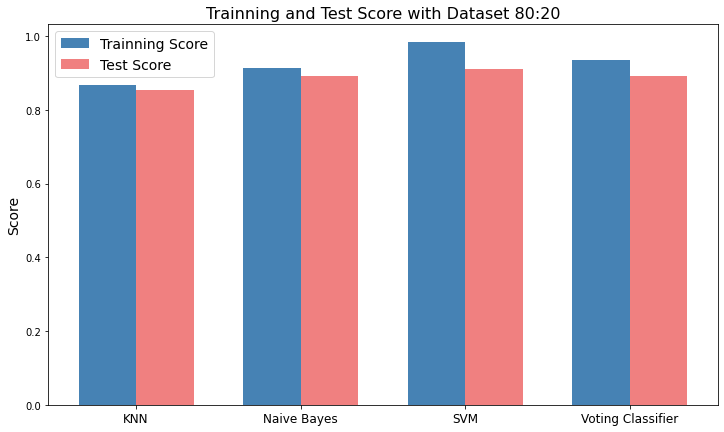

In [37]:
algo = ['KNN', 'Naive Bayes', 'SVM', 'Voting Classifier']
acc_all=[acc_knn,acc_nv,acc_svm,acc_vc]
val_all =[val_knn,val_nv,val_svm,val_vc]

x = np.arange(len(algo))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

acc_v = ax.bar(x - width/2, acc_all, width, label='Trainning Score', color='steelblue')
val_v = ax.bar(x + width/2, val_all, width, label='Test Score', color='lightcoral')

ax.set_title('Trainning and Test Score with Dataset 80:20', size=16)
ax.set_ylabel('Score', size=14)
ax.set_xticks(x)
ax.set_xticklabels(algo, size=12)
ax.legend(fontsize=14)

plt.show()

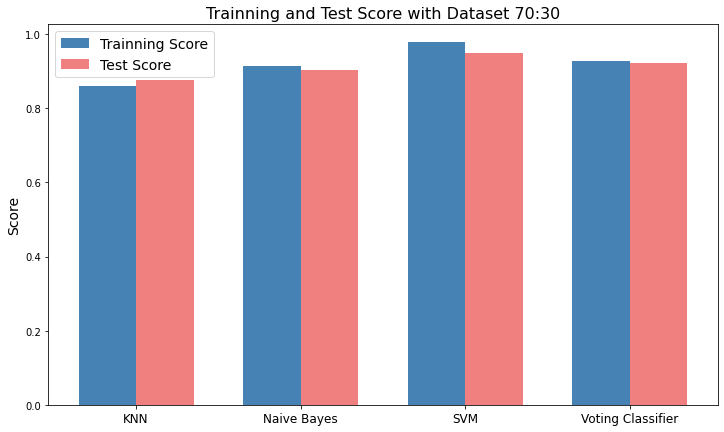

In [40]:
algoritms = ['KNN', 'Naive Bayes', 'SVM', 'Voting Classifier']
acc_all=[acc_knn_3,acc_nv_3,acc_svm_3,acc_vc_3]
val_all =[val_knn_3,val_nv_3,val_svm_3,val_vc_3]

x = np.arange(len(algoritms))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

acc_v = ax.bar(x - width/2, acc_all, width, label='Trainning Score', color='steelblue')
val_v = ax.bar(x + width/2, val_all, width, label='Test Score', color='lightcoral')

ax.set_title('Trainning and Test Score with Dataset 70:30', size=16)
ax.set_ylabel('Score', size=14)
ax.set_xticks(x)
ax.set_xticklabels(algoritms, size=12)
ax.legend(fontsize=14)

plt.show()

# Testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["positif","negatif"])


LabelEncoder()

In [ ]:
riview = " hpny sangat rusak"

riview_vec = vectorizer.transform([riview]).toarray()
pred_text = model_VC.predict(riview_vec)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['negatif']


In [ ]:
#simpan hasil
import pickle

with open('vcm_model', 'wb') as r:
  pickle.dump(model_VC,r)

In [ ]:
import pickle
with open('vcm_model', 'rb') as r:
  model = pickle.load(r)

In [ ]:
result = pd.read_csv(r'prediction_result.txt')
result.head()

,1
0,1
1,1
2,0
3,0
4,0


In [ ]:
def prediksi_komen(komen):
  result = model.predict(vectorizer.transform([komen]).toarray())
  if result== 1:
    return "Positif"
  else:
    return "Negatif"

In [ ]:
prediksi_komen('ramnya besar')

'Negatif'

# Testing TO ANVIL

In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 51 kB 177 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=650e75b2152ca02f301310a186dbba2b584e3da481fa2e3a1a0b84877d827b0a
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
url =["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPO2TlAYYrQ_8YTf1A_BUnwUo9NoGyc8j5bQ&usqp=CAU",
      "https://assets.jalantikus.com/assets/cache/560/315/userfiles/2020/10/25/hp-murah-ram-besar-2020-1eb3b.jpg",
      "https://asset-a.grid.id/crop/0x0:0x0/x/photo/2018/07/24/2711887939.jpg"
      "https://www.rancahpost.com/wp-content/uploads/2020/07/Cara-Mengatasi-Layar-HP-Bergaris-Sebelum-Membawanya-ke-Service-Center.jpg",
      "https://cdn0-production-images-kly.akamaized.net/J0SLypVIxcxFSbP-0EYeQuGm1bo=/640x360/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/1248826/original/092257000_1464586750-apple-lightning-cable-fray-broken.jpg",
      "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcpZMPR6CP3kL6OMbLNrxUQcALfg6qgk_lmw&usqp=CAU",]

In [ ]:
#connect to anvil
import anvil.server
anvil.server.connect('LO6VCXAQEK3BTNS5LCMEIDQO-4XOVGZKQIU5GKFK5')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
import anvil.regex
import random
@anvil.server.callable
def prediksi_komen(komen): 
  result = model.predict(vectorizer.transform([komen]).toarray())
  if result== 1:
    return 'Positif'
  else:
    return 'Negatif'


@anvil.server.callable
def clue_komen():
  return random.choice(url)